## Step 1: Installation and Importing Libraries

In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import combinations
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None

***This step installs the Yellowbrick library and imports all the necessary libraries for data analysis, visualization, and machine learning.***

## Step 2: Data Loading and Initial Exploration

In [3]:
df = pd.read_csv(r"C:\Users\hp\Downloads\online_retail_final.csv")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392735 entries, 0 to 392734
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392735 non-null  int64  
 1   StockCode    392735 non-null  object 
 2   Description  392735 non-null  object 
 3   Quantity     392735 non-null  int64  
 4   InvoiceDate  392735 non-null  object 
 5   UnitPrice    392735 non-null  float64
 6   CustomerID   392735 non-null  float64
 7   Country      392735 non-null  object 
 8   TotalPrice   392735 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 27.0+ MB


In [6]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,TotalPrice
count,392735.000000,392735.000000,392735.000000,392735.000000,392735.000000
mean,560624.318859,10.242645,2.787111,15300.835136,18.246537
std,13113.076784,16.172009,2.704759,1709.095993,32.558080
min,536365.000000,1.000000,0.120000,12347.000000,0.120000
25%,549233.000000,2.000000,1.250000,13975.000000,4.680000
50%,561894.000000,5.000000,1.950000,15159.000000,11.700000
75%,572103.000000,12.000000,3.750000,16800.000000,19.500000
max,581587.000000,147.000000,19.960000,18287.000000,1914.240000


In [7]:
df.shape

(392735, 9)

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [9]:
df.isnull().sum()*100/len(df)

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
TotalPrice     0.0
dtype: float64

***This step involves loading the dataset from a CSV file, displaying the first few rows, getting information about the dataset (like column data types), getting summary statistics, checking the shape of the dataset, and identifying missing values.***

## Step 3: Exploratory Data Analysis (EDA)

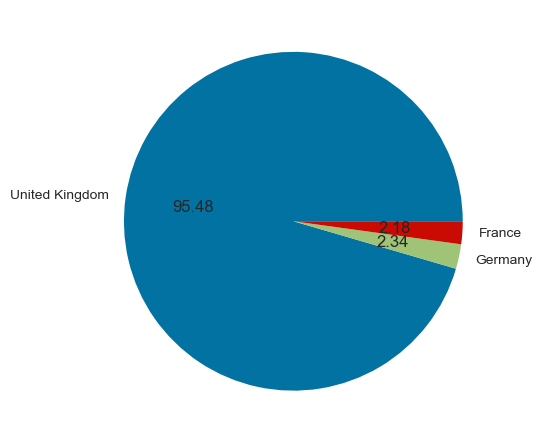

In [10]:
#Countries Contribution 
plt.pie(df.Country.value_counts().values[0:3],labels=df.Country.value_counts().index[0:3],autopct='%0.2f')
plt.show()

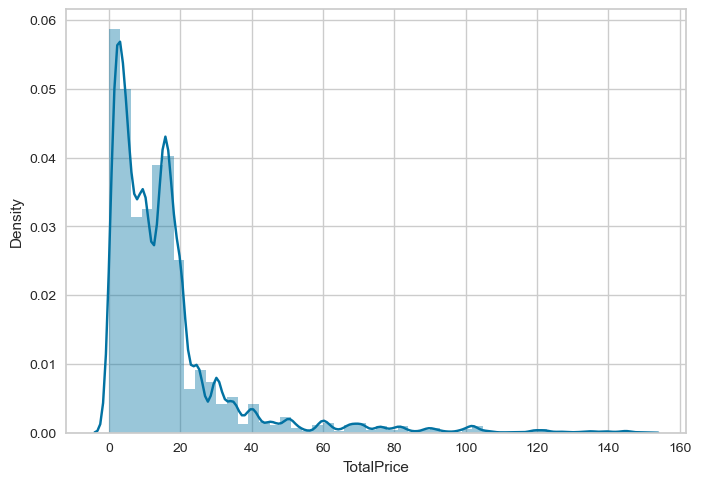

In [11]:
sns.distplot(df[(df['TotalPrice']<150) & (df['TotalPrice']>0)]['TotalPrice'])
plt.show()

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

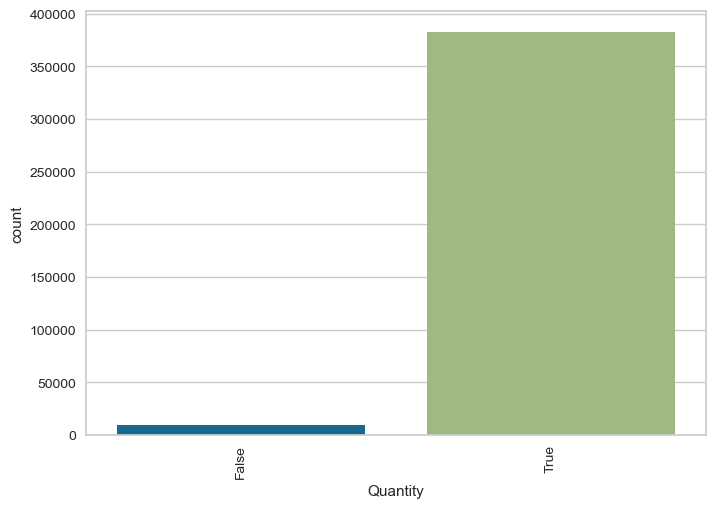

In [12]:
sns.countplot(x= df['Quantity']<50)
plt.xticks(rotation=90)

***This step involves visualizing the distribution of data by country, total price, and quantity using pie charts and histograms.***

## Step 4: Preparing RFM Model

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print(f"Min date: {df.InvoiceDate.min()}\nMax date: {df.InvoiceDate.max()} ")

Min date: 2010-12-01 08:26:00
Max date: 2011-12-09 12:50:00 


In [14]:
last_day = df.InvoiceDate.max() + dt.timedelta(days=1)

In [15]:
rfm_table = df.groupby("CustomerID").agg({"InvoiceDate": lambda x: (last_day - x.max()).days,
                                         "InvoiceNo": "nunique",
                                         "TotalPrice":"sum"})

In [16]:
rfm_table.rename(columns={"InvoiceDate": "Recency",
                         "InvoiceNo": "Frequency",
                         "TotalPrice": "Monetary"}, inplace=True)

In [17]:
rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,7,4060.40
12348.0,75,4,1437.24
12349.0,19,1,1417.60
12350.0,310,1,294.40
12352.0,36,7,1385.74


In [18]:
r_labels = range(5, 0, -1)
fm_labels = range(1, 6)

rfm_table["R"] = pd.qcut(rfm_table["Recency"], 5, labels=r_labels)
rfm_table["F"] = pd.qcut(rfm_table["Frequency"].rank(method='first'), 5, labels=fm_labels)
rfm_table["M"] = pd.qcut(rfm_table["Monetary"], 5, labels=fm_labels)

In [19]:
rfm_table.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347.0,2,7,4060.40,5,5,5
12348.0,75,4,1437.24,2,4,4
12349.0,19,1,1417.60,4,1,4
12350.0,310,1,294.40,1,1,2
12352.0,36,7,1385.74,3,5,4


In [20]:
rfm_table["RFM_Segment"] = rfm_table["R"].astype(str) + rfm_table["F"].astype(str) + rfm_table["M"].astype(str)
rfm_table["RFM_Score"] = rfm_table[["R", "F", "M"]].sum(axis=1)

rfm_table.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12347.0,2,7,4060.40,5,5,5,555,15
12348.0,75,4,1437.24,2,4,4,244,10
12349.0,19,1,1417.60,4,1,4,414,9
12350.0,310,1,294.40,1,1,2,112,4
12352.0,36,7,1385.74,3,5,4,354,12


In [21]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At-Risk',
    r'[1-2]5': 'Cannot lose them',
    r'3[1-2]': 'About To Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm_table['Segment'] = rfm_table["R"].astype(str) + rfm_table["F"].astype(str)
rfm_table['Segment'] = rfm_table['Segment'].replace(seg_map, regex=True)

***This step involves preparing the RFM (Recency, Frequency, Monetary) model by calculating recency, frequency, and monetary values for each customer. It then assigns labels and segments based on quantiles and predefined segmentation rules.***

## Step 5: Result Analysis

In [22]:
rfm_table.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
12347.0,2,7,4060.40,5,5,5,555,15,Champions
12348.0,75,4,1437.24,2,4,4,244,10,At-Risk
12349.0,19,1,1417.60,4,1,4,414,9,Promising
12350.0,310,1,294.40,1,1,2,112,4,Hibernating
12352.0,36,7,1385.74,3,5,4,354,12,Loyal Customers


***This step displays the resulting RFM table containing calculated recency, frequency, monetary values, segments, and scores for each customer.***

## Summary:

***The project involved analyzing online retail data using the RFM model to segment customers based on their purchasing behavior. It included steps such as data loading, exploratory data analysis, RFM model preparation, and result analysis. The RFM segmentation can provide insights into customer behavior, allowing businesses to tailor their marketing strategies accordingly.***